
# Self Attention


BERT (from Google) ,

GPT (from OpenAI) ,

GPT-2 (from OpenAI),

Transformer-XL (from Google/CMU) ,

XLNet (from Google/CMU) ,

XLM (from Facebook) ,

RoBERTa (from Facebook),

DistilBERT (from HuggingFace),

DistilGPT2,CTRL (from Salesforce),

CamemBERT (from FAIR, Inria, Sorbonne Université) ,

ALBERT (from Google Research),T5 (from Google),

XLM-RoBERTa (from Facebook AI),

MMBT (from facebook),

FlauBERT (from CNRS),

BART (from Facebook) ,

ELECTRA (from Google Research/Stanford University),

DialoGPT (from Microsoft Research) ,

Reformer (from Google Research) ,

MarianMT (developed by the Microsoft Translator Team),

Longformer (from AllenAI) ,

DPR (from Facebook) ,

Pegasus (from Google) ,

MBart (from Facebook) ,

LXMERT (from UNC Chapel Hill) ,

Funnel Transformer (from CMU/Google Brain) ,

Bert For Sequence Generation (from Google) ,

LayoutLM (from Microsoft Research Asia) ,

Microsoft’s CodeBERT,

ELMo,

XLNet,

ULMFiT ,

GPT-3(from OpenAI)


What All of these Have in common ??

> SelfAttention

###  Some Applications of selfattention
Sentiment Analysis,

Chatbots & Virtual Assistants,

Text Classification,

Text Extraction,

Machine Translation,

Text Summarization,

Market Intelligence,

Auto-Correct,

Intent Classification,

Urgency Detection,

Speech Recognition,

Code Oracle,

Designer,

JSX Layout maker,

Regex Generator,

Website Mocker,

Object usecase generation,

Autoplotter,

Quiz Producer,

Words Recomendation


In [2]:
import numpy as np

# Linear (Artificial Neural Network)

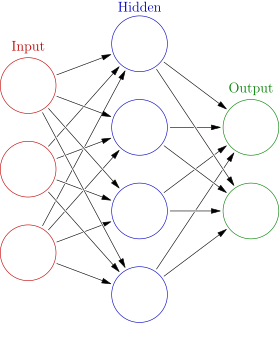

In [3]:
class Linear():
    def __init__(self,input_dim,output_dim):
        self.Weight=np.random.randint(0,2,size=(input_dim,output_dim)).astype('float32')#*np.sqrt(6./input_dim+output_dim)#Xavier Initializatio

        #self.Weight=np.random.uniform(-1,1,size=(input_dim,output_dim))*np.sqrt(6./input_dim+output_dim)#Xavier Initializatio
    def forward(self,data):# data shape is batchsize,....,hidden layer
        self.input=data
        output=np.dot(data,self.Weight)
        return output
    def backward(self,err,lr):
        der_W=np.dot((self.input).reshape(-1,self.input.shape[-1]).T,err.reshape(-1,err.shape[-1])).astype('float32') 
        der_inp=np.dot(err,self.Weight.T)
        self.Weight-=der_W*lr
        return der_inp


### SOFTMAX

 a wonderful activation function that turns values in the vectors  into probabilities that sum to one

In [4]:
class Softmax():
    def __init__(self,axis=-1):
        self.axis=axis
    def __call__(self,x):
        e_x = np.exp(x - np.max(x,axis=self.axis,keepdims=True)) # max(x) subtracted for numerical stability
        self.sm = e_x / np.sum(e_x,axis=self.axis,keepdims=True)
        return self.sm
        
    def backward(self,err):
        """if i == j:
                 self.gradient[i,j] = self.value[i] * (1-self.value[i])
            else: 
                 self.gradient[i,j] = -self.value[i] * self.value[j]"""
        
        SM = self.sm.reshape(-1,1)
        jac = np.diagflat(self.sm) - np.dot(SM, SM.T)
        jac=np.sum(jac,axis=1,keepdims=True).reshape(err.shape)
        
        return jac*err


# Architecture of Self Attention

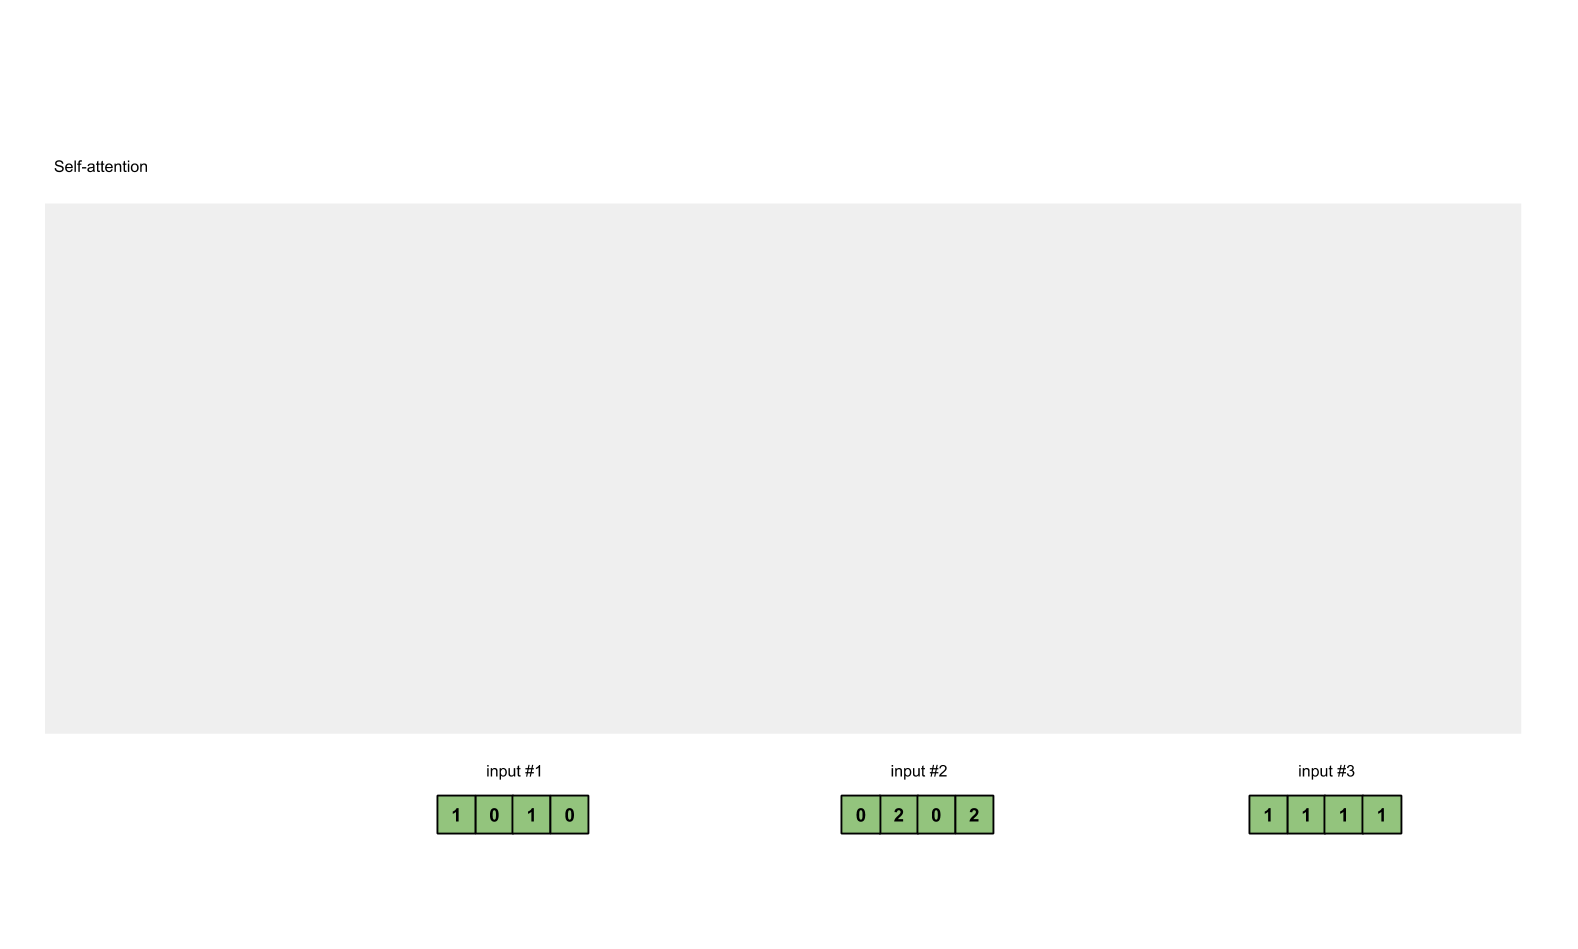


self attention allows the inputs to interact with each other and extract features and find out to which input the current input  should pay more attention 

multi head attention ;- it is similar to self attention but it extract many layer of features for an input with each other input(like how many kernels are used to extract different features in CNN) so that it could perform better in paying attention



### The Major components of Self Attention are
1) Align

2) Softmax

3) Translate

### Weights in self Attention are
1) Key

2) Query

3) Value


### What are Keys,Queries,Values ??

<b>Attention</b> is combinations of Query, Key,Value. Given a query (Q) and a set of key-value pairs (K, V) Weights 

<b>Query :</b> determines which values to focus , It converts the given input as a query , which could find which values to focus (pay Attention) on based on its key

<b>Key :</b> may be defined as a hint to the query to find its score for the corresponding value of the key

<b>Value :</b> is information extractor which try to extract useful information from the input 

<b>Explanation :</b>

(key-value) pair , Query    query finds how much attention to be given(based on score) to a value based on its key 
and attention is multiplied with the value and added for all words(values) to get the op sequence for the word corresponding to the current query


### What is going inside Attention Layer ??

![Untitled-3.png]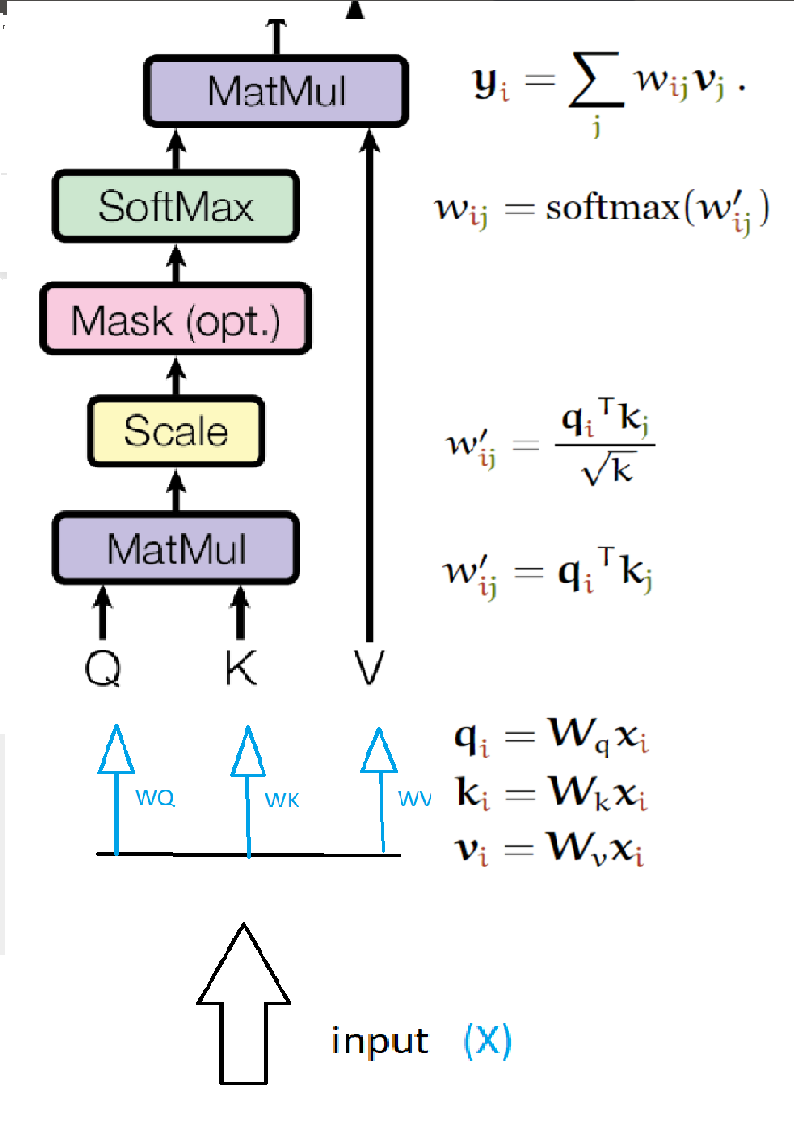



Step-1 ) pass the input (batch,seqlen,dim) to the three Linear layers (key,query,value) for attention (dim is corresponding vector for the word at the position representing its features]

Queries tries to find foucs on values with help of keys and sum the values multiplied by the scores 

Step-2 ) to find the scores the <b>query</b> has to react (dot product ) with all <b> keys</b> of the sequence to find how much the word of the corresponding query must pay <b>Attention</b> to the words corresponding to its keys

EG:
query of eating will be

[2][-4][6][0]

key of apple would be

[1][-6][5][1]

key of green would be

[-8][2][-1][5]

so score of apple for words eating is  56 and  so score of green for words eating is -30\

so eating would pay mre attention to apple rather than green

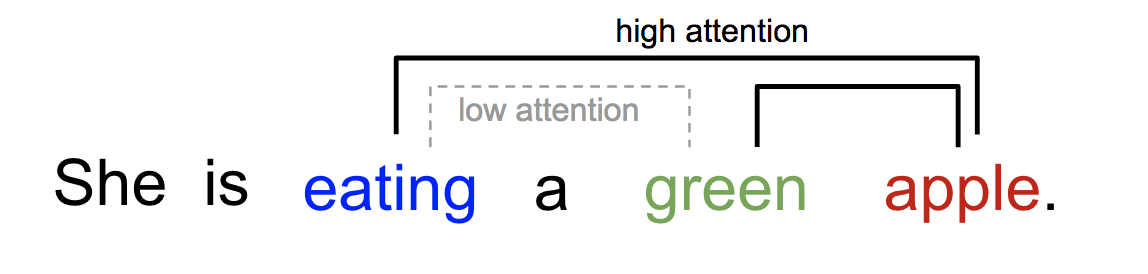

step-3 ) Scale
since the dot product are high value (56,-30) allowing them further will cause a high exponential variation to the score after softmax so scaling them with number of hidden vectors(research paper)

Step-4) Convert scores to probability

In [9]:
x=[56,40]
print(x)
print(Softmax()(np.array((x))))
x=[i/4 for i in x]
print(x)
print(Softmax()(x))


[56, 40]
[9.99999887e-01 1.12535162e-07]
[14.0, 10.0]
[0.98201379 0.01798621]


Step-5) multiply the probability scores with the values of the corresponding keys and sum them to get the word of corresponding query

In [11]:
val_app=np.array([3,-6,7,1])
val_gre=np.array([1,4,5,2])
score=[0.98201379,0.01798621]

op_eating=val_app*score[0]+val_gre*score[1]
print(op_eating)

[ 2.96402758 -5.8201379   6.96402758  1.01798621]


In [14]:
# to design it in more algebric way
"""
score shape (1,2)
values shape (2,4)
op shape (1,2)(2,4)-->(1,4)
"""
val=np.array(([[3,-6,7,1],[1,4,5,2]]))
scores=np.array(([[0.98201379,0.01798621]]))
op_eating=np.matmul(scores,val)
print(op_eating)

[[ 2.96402758 -5.8201379   6.96402758  1.01798621]]


In [15]:
class MultiAttention():
    def __init__(self,dim,heads,mask=False):
        
        self._Keyss=Linear(dim,dim*heads) # for self attention Feed_Forward(dim,dim) it has only one vector to store the attention between two words where multi head attention has muliple vectors to store relationship/attention between two words for improved performance
        self._Query=Linear(dim,dim*heads)
        self._Value=Linear(dim,dim*heads)
        self._Unify=Linear(dim*heads,dim)
        self.head=heads
        self.D=dim
        self.sm=Softmax()
        self.mask=mask
        self.param={}
    def zero_grad(self):
        
        self._Keyss.zero_grad()
        self._Query.zero_grad()
        self._Value.zero_grad()
        self._Unify.zero_grad()
        
    def forward(self,input_vec,time_step):# after embedding layer and adding with pos enc the input reaches attention layer
        ts=time_step
        #initially we are passing the input vectors through (key,query ,value) Weights
        queries=self._Query.forward(input_vec,ts) #determines which values to focus
        keys   =self._Keyss.forward(input_vec,ts) #hint to find score for its value pair      
        values =self._Value.forward(input_vec,ts) # extract interesting features  
        #print(self._Keyss.Weight,'\n\n',self._Query.Weight,'\n\n')
        
        
        # batchsize,seqlen,head*dim   ====>>>   batchsize*head,seqlen,dim since the dimensions of sequence will react with other all sequences within same head ,heads wont react with each other
        sha=list(keys.shape)
        sha_dh=sha.copy()     
        self.param[str(ts)+'shape_BSDxh']=sha_dh
        sha[-1]=int(sha[-1]/self.head) # shapes will be same in all time steps
        sha[0]*=self.head
        self.param[str(ts)+'shape_BxhSD']=sha
        
        
        # Weight are reshaped

        keys=keys.reshape(sha)
        queries=queries.reshape(sha)
        values=values.reshape(sha)
        
        # parameters are saved for backpropagation
        
        self.param[str(ts)+'k']=keys   
        self.param[str(ts)+'q']=queries
        self.param[str(ts)+'v']=values
        
        
        # Each Query is iterated with each other key to Get its score with the corresponding word
        
        #print(keys,'\n\n',queries,'\n\n')
       
        W_=np.matmul(queries, np.transpose(keys, (0, 2, 1)))
        
        W_=W_*(1./np.sqrt(self.D))
        if(self.mask):
            print("mask activated")
            W_=Masking(W_)# masking will be done each word will not have acces to future word
            
        
        #print('\n\n',queries,'\n\n',keys,'\n\n',W_,'\n\n')
        W=self.sm(W_) 

        
        self.param[str(ts)+'W']=W
        
        Y=np.matmul(W,values) # the scores are multiplied with the values and they are added
        # concat the heads
        
        Y=Y.reshape(sha_dh)
        op=self._Unify.forward(Y,ts)
        
        
        return op
    
    def backward(self,err,time_step,lr):
        ts=time_step
        con=np.sum(err.reshape(-1))
        dY=self._Unify.backward(err,ts,lr)
        
        dY=dY.reshape(self.param[str(ts)+'shape_BxhSD'])
        
        dval=np.matmul(self.param[str(ts)+'W'],dY)     
        dW =np.matmul(self.param[str(ts)+'v'],np.transpose(dY, (0, 2, 1)))
        
        dW_=self.sm.backward(dW)
        der_Scale=(-0.5*(np.power(self.D,-(3/2))))
        dW_=dW_*der_Scale
        
        zw=np.sum(dW_.reshape(-1))
        dkeys=np.matmul(dW_,self.param[str(ts)+'q'])
        dque=np.matmul(dW_,self.param[str(ts)+'k'])
        sha_=self.param[str(ts)+'shape_BSDxh']
        dkeys=dkeys.reshape(sha_)
        dque=dque.reshape(sha_)
        dval=dval.reshape(sha_)
        
        x=np.sum(dque.reshape(-1))
        y=np.sum(dkeys.reshape(-1))
        z=np.sum(dval.reshape(-1))
      
        der_inp =self._Keyss.backward(dkeys,ts,lr)
        der_inp+=self._Query.backward(dque,ts,lr)
        der_inp+=self._Value.backward(dval,ts,lr)
        #print(x,y,z,zw,con)
        
        return der_inp   


In [17]:
a=SelfAttn(4,1)
x=np.random.uniform(0,4,size=(1,4,4))
z=a.forward(x)
#print(z.shape)
c=a.backward(z,0.1)
print(x.shape,z.shape,c.shape)



 [[[4.36718742 7.11832084 4.36718742 5.00261941]
  [0.92355622 6.42031739 0.92355622 3.56486463]
  [2.41507912 4.18115357 2.41507912 2.3756332 ]
  [4.37140233 7.90746028 4.37140233 4.07691085]]] 

 [[[7.11832084 5.72148065 7.54564374 5.72148065]
  [6.42031739 3.42228163 3.95535124 3.42228163]
  [4.18115357 4.10195409 4.4463332  4.10195409]
  [7.90746028 4.94422639 6.69626979 4.94422639]]] 

 [[[133.39000673  86.79376058  87.39739206 123.70589882]
  [ 70.67302147  43.75461828  48.92672727  62.8563662 ]
  [ 72.92916328  47.49723152  47.73170142  67.68740168]
  [132.6704365   86.37011514  86.87355592 123.09222363]]] 


(1, 4, 4) (1, 4, 4) (1, 4, 4)


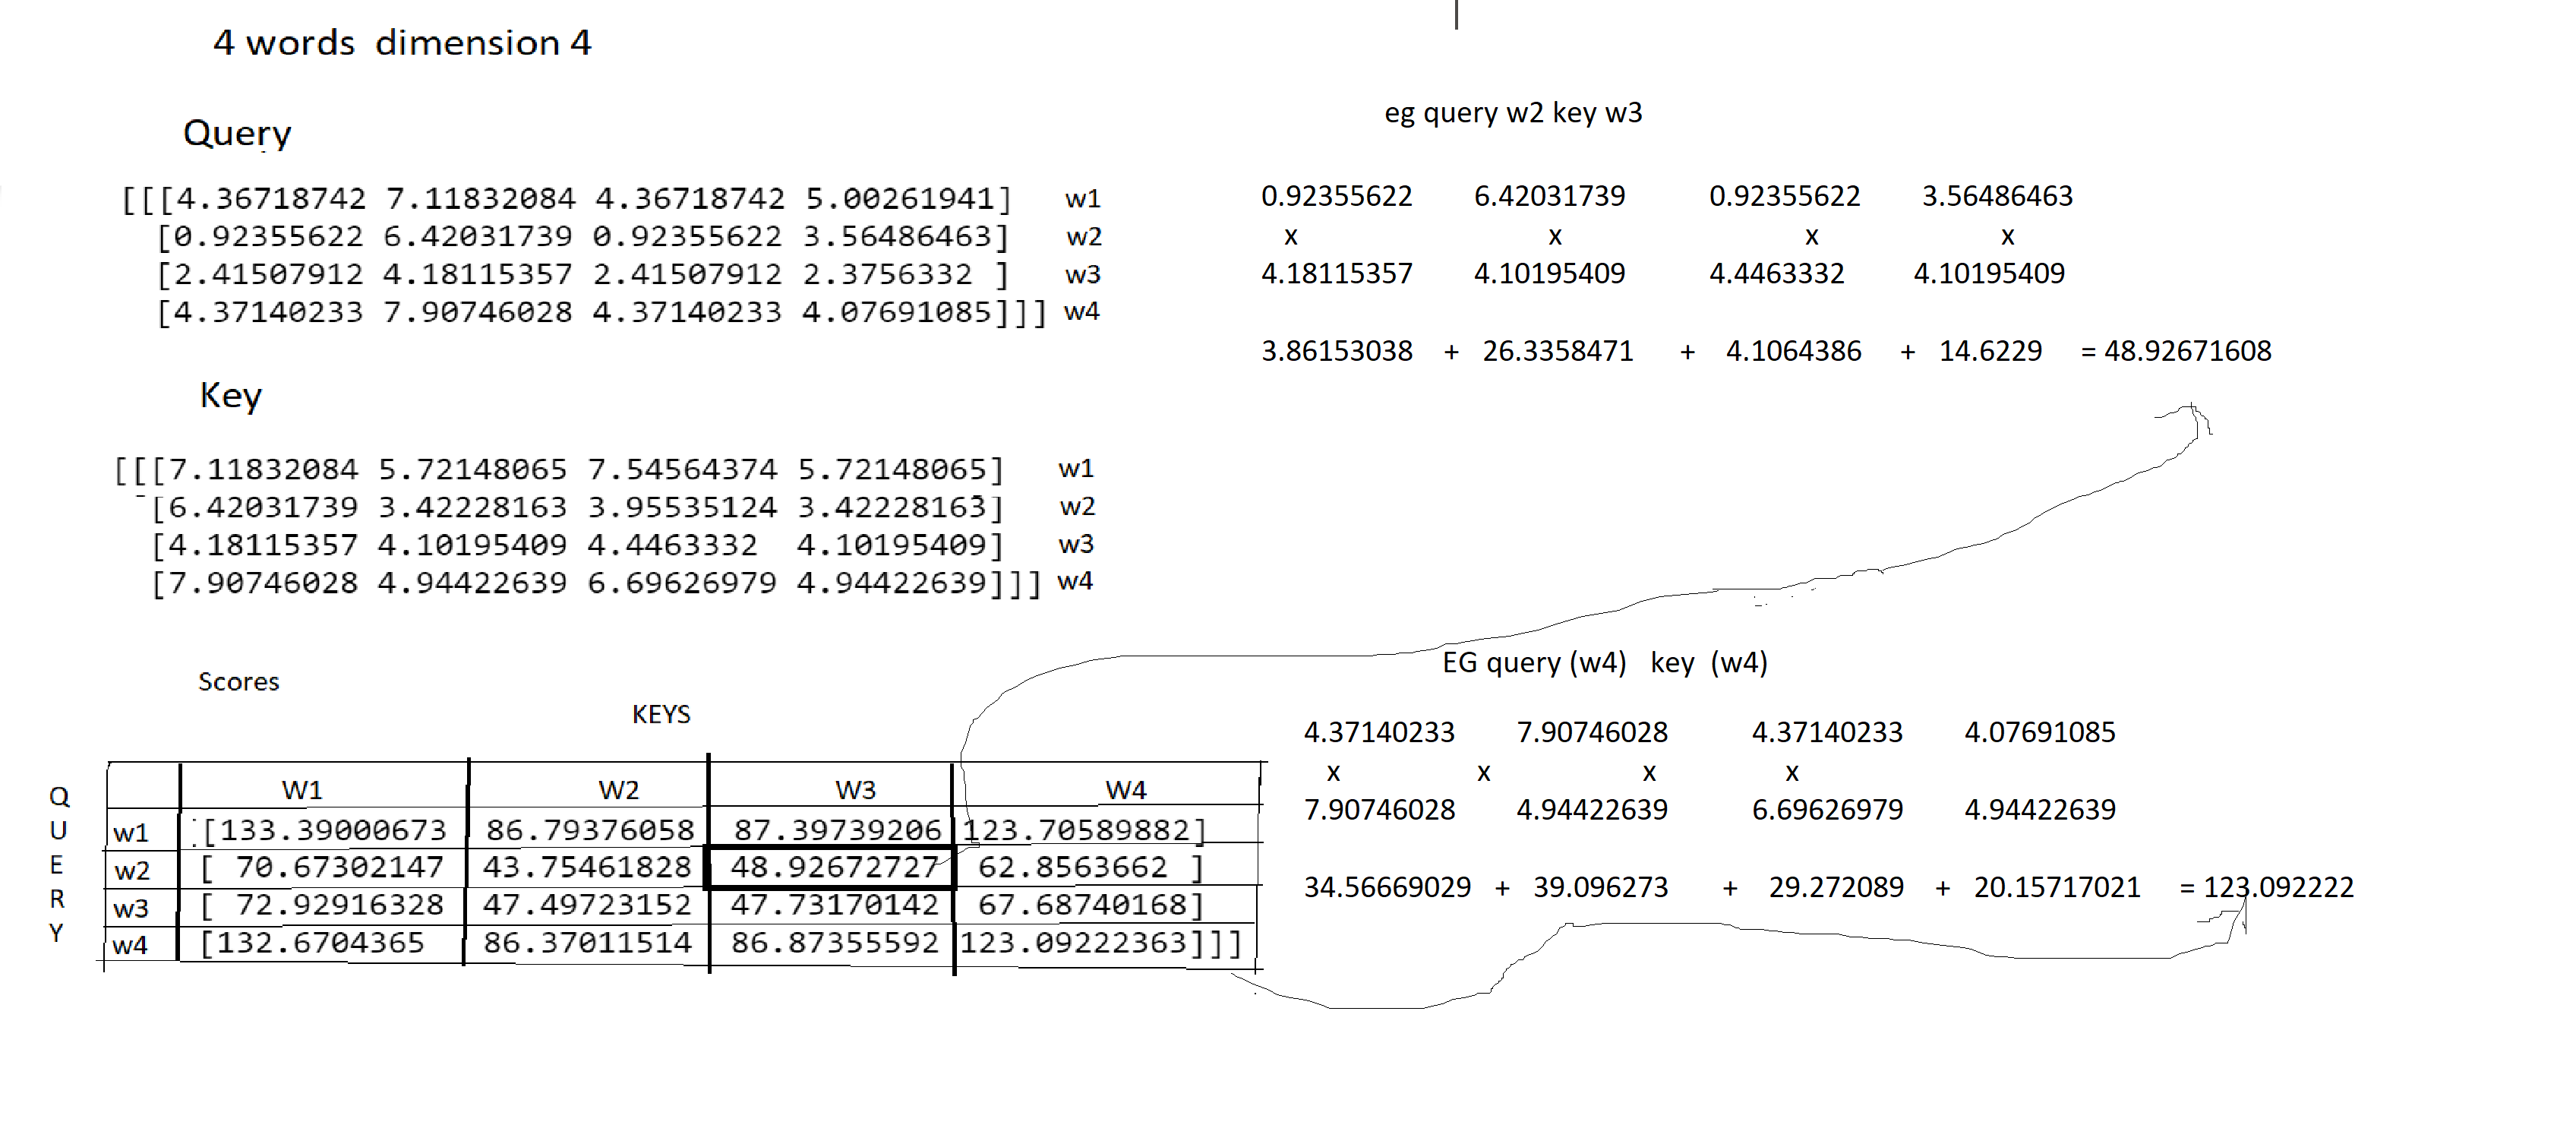

Each word(row) of query must react with each word(row) of key to get the score
so 
Each word(row) of query will react with each word(col) of key.transpose to get the score which matrixmultiplication of (query and key transpose)


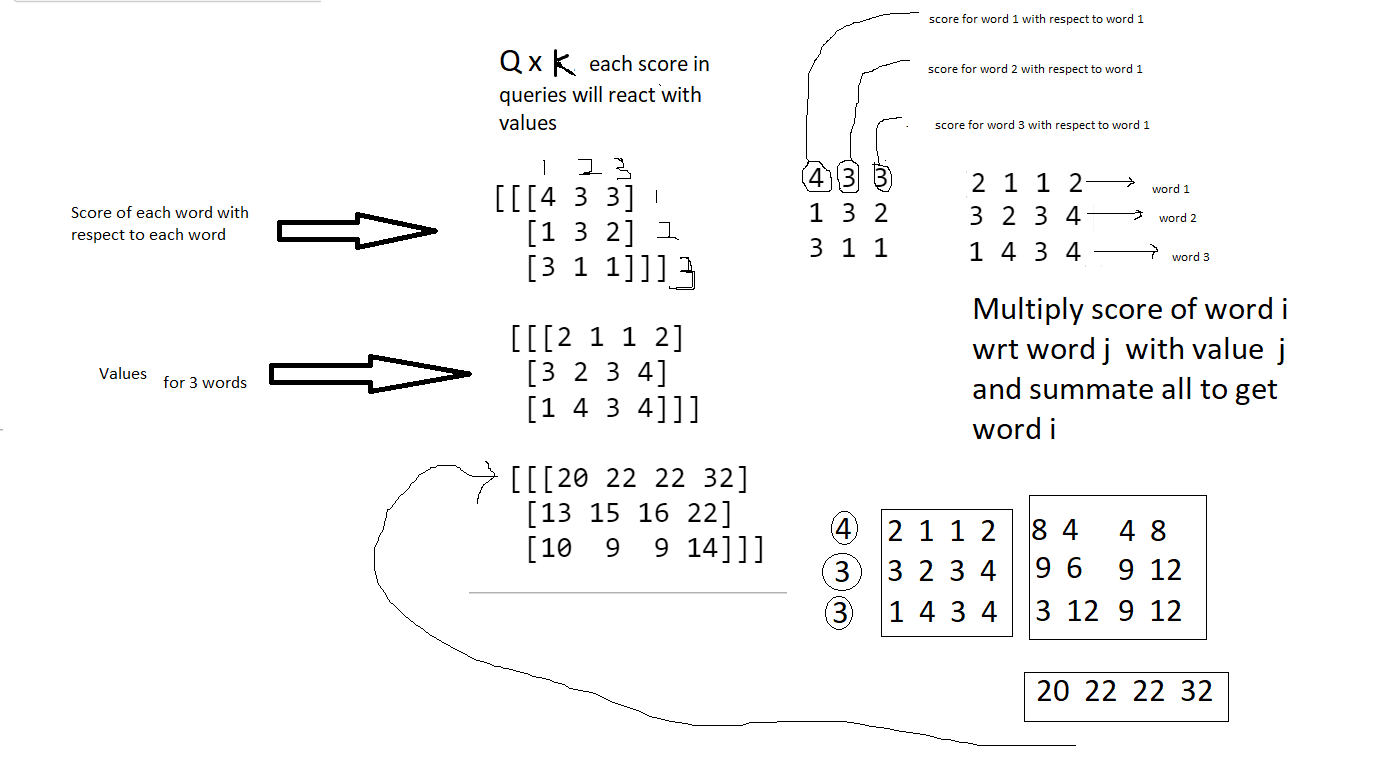

In [5]:
a=np.random.randint(-1,2,(10,2,3))
z=np.transpose(a,(0, 2, 1))
print(z.shape)

(10, 3, 2)


In [31]:
W=np.random.randint(1,5,(1,3,3))
value=np.random.randint(1,5,(1,3,4))

In [32]:
Y=np.matmul(W,value)
print(W,'\n\n',value,'\n\n',Y)

[[[2 3 2]
  [3 2 2]
  [4 1 4]]] 

 [[[3 3 4 4]
  [2 1 4 2]
  [3 4 2 3]]] 

 [[[18 17 24 20]
  [19 19 24 22]
  [26 29 28 30]]]
